<a href="https://colab.research.google.com/github/varunreddy1268/spark_foundation/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("/content/Iris.csv")

In [18]:
df.info()
df.drop('Id',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
#convert Species into numerical category
dic1={'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2}
df['Species']=df['Species'].map(dic1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [22]:
df.corr()['Species']
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

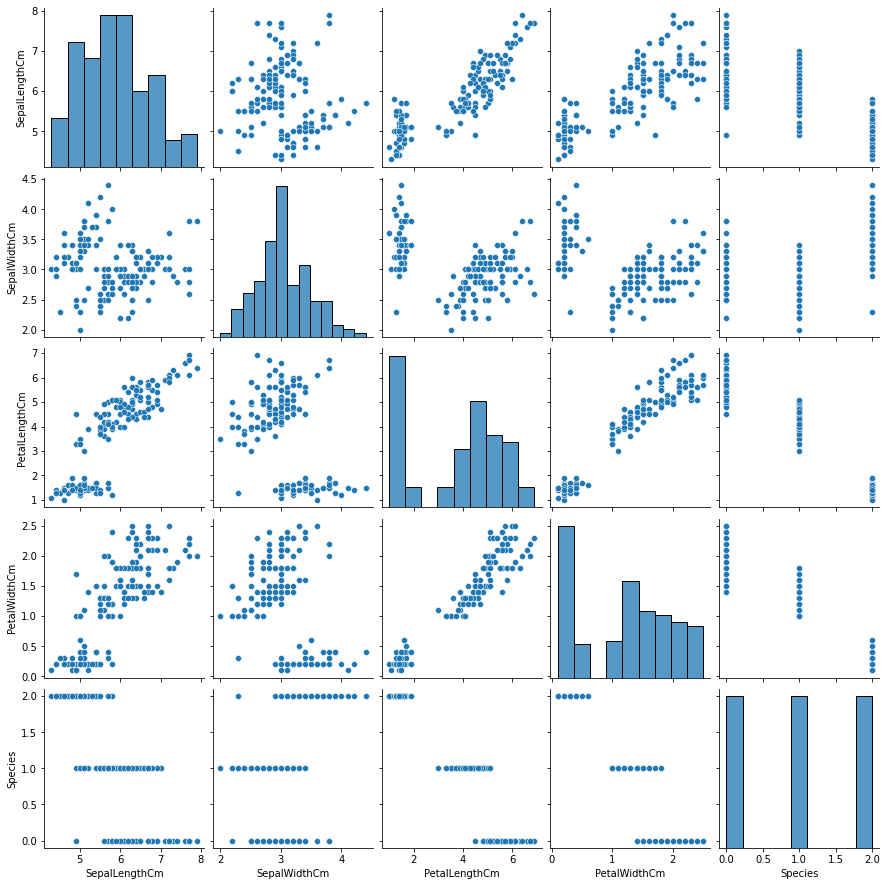

In [21]:
sns.pairplot(df)

In [25]:
x=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df[['Species']]

In [26]:
#Since there are no null values lets directly make decision tree.
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=0)
model.fit(x,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(279.0, 498.3, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(321.9230769230769, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 50, 0]'),
 Text(171.69230769230768, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [5, 49, 0]'),
 Text(85.84615384615384, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [1, 47, 0]'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(257.53846153846155, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [4, 2, 0]'),
 Text(214.61538461538458, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(300.46153846153845, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(257.53846153846155, 45

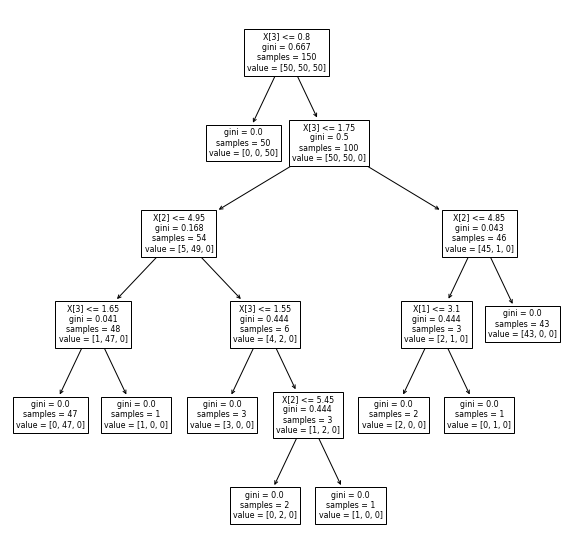

In [28]:
plt.figure(figsize=(10,10))
tree.plot_tree(model)